In [1]:
#Data Science Project - Yelp Reviews - Part 2/2
#RQ2: Are Yelp users consistent across different areas?
#Focus on one particular type of business (e.g. fast food restaurant, pub, lounge, etc) and
#compare the empirical distributions of the ratings for this category across two different
#metropolitan areas. Discuss differences and similarities between the distributions and their
#main statistical properties (e.g., mean, standard deviation, skewness, etc)

import pandas as pd
%matplotlib inline
import json
from matplotlib import style
#style.use('dark_background')
hfont = {'fontname':'Helvetica'}
print(pd.__version__)

1.2.1


In [2]:
df_rev = pd.read_json('yelp_academic_dataset_review.json', lines=True , orient='columns')

In [76]:
df_rev.head()

,votes,user_id,review_id,stars,date,text,type,business_id,city,categories
0,"{'funny': 0, 'useful': 0, 'cool': 0}",PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,4,2012-08-01,"Mr Hoagie is an institution. Walking in, it do...",review,5UmKMjUEUNdYWqANhGckJw,DRAVOSBURG,"[Fast Food, Restaurants]"
1,"{'funny': 0, 'useful': 0, 'cool': 0}",Iu6AxdBYGR4A0wspR9BYHA,KPvLNJ21_4wbYNctrOwWdQ,5,2014-02-13,Excellent food. Superb customer service. I mis...,review,5UmKMjUEUNdYWqANhGckJw,DRAVOSBURG,"[Fast Food, Restaurants]"
2,"{'funny': 1, 'useful': 1, 'cool': 0}",auESFwWvW42h6alXgFxAXQ,fFSoGV46Yxuwbr3fHNuZig,5,2015-10-31,Yes this place is a little out dated and not o...,review,5UmKMjUEUNdYWqANhGckJw,DRAVOSBURG,"[Fast Food, Restaurants]"
3,"{'funny': 0, 'useful': 0, 'cool': 0}",qiczib2fO_1VBG8IoCGvVg,pVMIt0a_QsKtuDfWVfSk2A,3,2015-12-26,PROS: Italian hoagie was delicious. Friendly ...,review,5UmKMjUEUNdYWqANhGckJw,DRAVOSBURG,"[Fast Food, Restaurants]"
4,"{'funny': 0, 'useful': 1, 'cool': 0}",qEE5EvV-f-s7yHC0Z4ydJQ,AEyiQ_Y44isJmNbMTyoMKQ,2,2016-04-08,First the only reason this place could possibl...,review,5UmKMjUEUNdYWqANhGckJw,DRAVOSBURG,"[Fast Food, Restaurants]"


In [4]:
df_bus = pd.read_json('yelp_academic_dataset_business.json', lines=True , orient='columns')

In [75]:
df_bus.head()

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
0,5UmKMjUEUNdYWqANhGckJw,"4734 Lebanon Church Rd\nDravosburg, PA 15034","{'Friday': {'close': '21:00', 'open': '11:00'}...",True,"[Fast Food, Restaurants]",Dravosburg,7,Mr Hoagie,[],-79.900706,PA,3.5,40.354327,"{'Take-out': True, 'Drive-Thru': False, 'Good ...",business
1,UsFtqoBl7naz8AVUBZMjQQ,"202 McClure St\nDravosburg, PA 15034",{},True,[Nightlife],Dravosburg,5,Clancy's Pub,[],-79.886814,PA,3.0,40.350553,"{'Happy Hour': True, 'Accepts Credit Cards': T...",business
2,cE27W9VPgO88Qxe4ol6y_g,"1530 Hamilton Rd\nBethel Park, PA 15234",{},False,"[Active Life, Mini Golf, Golf]",Bethel Park,5,Cool Springs Golf Center,[],-80.014660,PA,2.5,40.354115,{'Good for Kids': True},business
3,mVHrayjG3uZ_RLHkLj-AMg,"414 Hawkins Ave\nBraddock, PA 15104","{'Tuesday': {'close': '19:00', 'open': '10:00'...",True,"[Bars, American (New), Nightlife, Lounges, Res...",Braddock,26,Emil's Lounge,[],-79.866211,PA,4.5,40.408830,"{'Alcohol': 'full_bar', 'Noise Level': 'averag...",business
4,mYSpR_SLPgUVymYOvTQd_Q,"1000 Clubhouse Dr\nBraddock, PA 15104","{'Sunday': {'close': '15:00', 'open': '10:00'}...",True,"[Active Life, Golf]",Braddock,3,Grand View Golf Club,[],-79.855782,PA,5.0,40.403405,"{'Parking': {'garage': False, 'street': False,...",business


In [82]:
df_bus['city'] = df_bus['city'].apply(lambda name : name.upper())
df_bus.head()

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
0,5UmKMjUEUNdYWqANhGckJw,"4734 Lebanon Church Rd\nDravosburg, PA 15034","{'Friday': {'close': '21:00', 'open': '11:00'}...",True,"[Fast Food, Restaurants]",DRAVOSBURG,7,Mr Hoagie,[],-79.900706,PA,3.5,40.354327,"{'Take-out': True, 'Drive-Thru': False, 'Good ...",business
1,UsFtqoBl7naz8AVUBZMjQQ,"202 McClure St\nDravosburg, PA 15034",{},True,[Nightlife],DRAVOSBURG,5,Clancy's Pub,[],-79.886814,PA,3.0,40.350553,"{'Happy Hour': True, 'Accepts Credit Cards': T...",business
2,cE27W9VPgO88Qxe4ol6y_g,"1530 Hamilton Rd\nBethel Park, PA 15234",{},False,"[Active Life, Mini Golf, Golf]",BETHEL PARK,5,Cool Springs Golf Center,[],-80.014660,PA,2.5,40.354115,{'Good for Kids': True},business
3,mVHrayjG3uZ_RLHkLj-AMg,"414 Hawkins Ave\nBraddock, PA 15104","{'Tuesday': {'close': '19:00', 'open': '10:00'...",True,"[Bars, American (New), Nightlife, Lounges, Res...",BRADDOCK,26,Emil's Lounge,[],-79.866211,PA,4.5,40.408830,"{'Alcohol': 'full_bar', 'Noise Level': 'averag...",business
4,mYSpR_SLPgUVymYOvTQd_Q,"1000 Clubhouse Dr\nBraddock, PA 15104","{'Sunday': {'close': '15:00', 'open': '10:00'}...",True,"[Active Life, Golf]",BRADDOCK,3,Grand View Golf Club,[],-79.855782,PA,5.0,40.403405,"{'Parking': {'garage': False, 'street': False,...",business


In [90]:
bus_short=df_bus[["categories","business_id","city","state","stars"]] #taking 3 columns from the business.json dataframe
rev_short=df_rev[["business_id","user_id"]] #taking 3 columns from the review.json dataframe

In [95]:
bus_short.head()

,categories,business_id,city,state,stars
0,"[Fast Food, Restaurants]",5UmKMjUEUNdYWqANhGckJw,DRAVOSBURG,PA,3.5
1,[Nightlife],UsFtqoBl7naz8AVUBZMjQQ,DRAVOSBURG,PA,3.0
2,"[Active Life, Mini Golf, Golf]",cE27W9VPgO88Qxe4ol6y_g,BETHEL PARK,PA,2.5
3,"[Bars, American (New), Nightlife, Lounges, Res...",mVHrayjG3uZ_RLHkLj-AMg,BRADDOCK,PA,4.5
4,"[Active Life, Golf]",mYSpR_SLPgUVymYOvTQd_Q,BRADDOCK,PA,5.0


In [96]:
#filter specific rows from a DataFrame 
lv1 = bus_short[bus_short['city'].str.contains('VEGAS', regex=False)] #fast approach
lv2 = bus_short[bus_short['city'].str.contains('EDIN', regex=False)] #fast approach

#Now I want to find the empirical PDF of the number of reviews received for the individual business in LA

In [102]:
#now we want to filter for a particular type of business in both of these areas but the issue is that categories column is a string   
#To do that we are going to use the below command for our dataframes
lv1new = lv1[lv1['categories'].str.contains('Fast Food', regex=False)] #fast approach
lv2new = lv2[lv2['categories'].str.contains('Fast Food', regex=False)] #fast approach

In [108]:
lv1new.head()

,categories,business_id,city,state,stars
8741,"[Burgers, Fast Food, Restaurants]",n1f9rWJzdGX982bFvZPBHg,NORTH LAS VEGAS,NV,2.5
8746,"[Fast Food, Chicken Wings, Restaurants]",i7HvZ1yTTIaR6bfa_3jGEw,NORTH LAS VEGAS,NV,2.0
8753,"[Fast Food, Restaurants]",NkmE03gbKjSdqDM3SJsJmw,NORTH LAS VEGAS,NV,1.5
8756,"[American (Traditional), Fast Food, Restaurants]",KBP-RXCaDQwfMP_-TLwuFg,NORTH LAS VEGAS,NV,3.0
8757,"[Fast Food, Restaurants]",hvVckRvOa814ry8q8WGwOg,NORTH LAS VEGAS,NV,3.5


In [106]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import kurtosis, skew
import numpy as np
import warnings
warnings.filterwarnings("ignore")
#list_of_dists = 'weibull_min','norm','weibull_max','beta','invgauss','uniform','gamma','expon','lognorm','pearson3','triang'
list_of_dists = 'alpha','anglit','arcsine','beta','betaprime','bradford','burr','burr12','cauchy','chi','chi2','cosine','dgamma','dweibull','erlang','expon','exponnorm','exponweib','exponpow','f','fatiguelife','fisk','foldcauchy','foldnorm','genlogistic','genpareto','gennorm','genexpon','genextreme','gausshyper','gamma','gengamma','genhalflogistic','gilbrat','gompertz','gumbel_r','gumbel_l','halfcauchy','halflogistic','halfnorm','halfgennorm','hypsecant','invgamma','invgauss','invweibull','johnsonsb','johnsonsu','kstwobign','laplace','levy','levy_l','logistic','loggamma','loglaplace','lognorm','lomax','maxwell','mielke','nakagami','ncx2','ncf','nct','norm','pareto','pearson3','powerlaw','powerlognorm','powernorm','rdist','reciprocal','rayleigh','rice','recipinvgauss','semicircular','t','triang','truncexpon','truncnorm','tukeylambda','uniform','vonmises','vonmises_line','wald','weibull_min','weibull_max'
print(type(list_of_dists))

<class 'tuple'>


No handles with labels found to put in legend.


Las Vegas mean 2.83116036505867
Las Vegas standard deviation 0.802968763130169
Las Vegas excess kurtosis of normal distribution (should be 0): -0.5769336681785537
Las Vegas skewness of normal distribution (should be 0): -0.04484085736856959


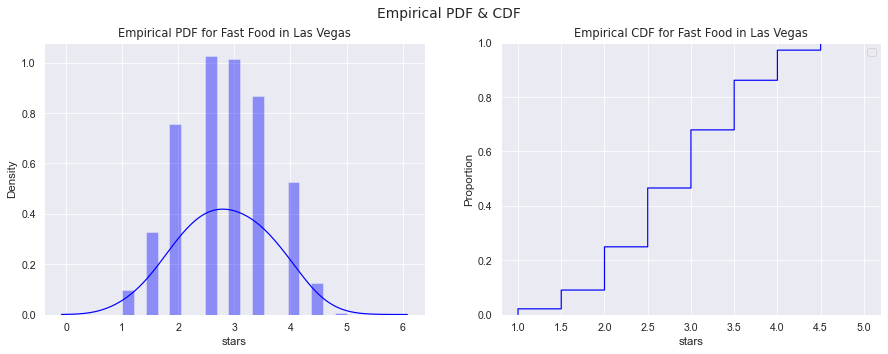

In [122]:
############################################################################################################
##########RQ.2_Las Vegas_fast food / Plotting the empirical PDF/CDF in linear log for the business reviews##################
###########################################################################################################

sns.set(context='paper', style='darkgrid', rc={'figure.facecolor':'white'}, font_scale=1.2)
#fig, axes = plt.subplots(1, 2, figsize=(18, 10))
fig, axes = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Empirical PDF & CDF', **hfont)
#Plotting the empirical PDF in log log for the business reviews

sns.distplot(lv1new['stars'], ax=axes[0], color='blue', label='Las Vegas', kde_kws={'bw':.45})  
#plt.xlabel('Number of stars', fontsize = 15, color= "black", **hfont)
#plt.ylabel('Frequency', fontsize = 15, color= "black", **hfont)
#plt.title('Empirical PDF for Fast Food', fontsize =20, color ="black", **hfont)
plt.legend()

sns.ecdfplot(lv1new['stars'], ax=axes[1], label='Las Vegas', color='blue')
axes[0].set_title('Empirical PDF for Fast Food in Las Vegas', **hfont)
axes[1].set_title('Empirical CDF for Fast Food in Las Vegas', **hfont)
#plt.title('Empirical CDF for Fast Food', fontsize =20, color ="black")
#plt.xlabel('Number of stars', fontsize = 15, color= "black")
#plt.show()
#plt.show()
print ('Las Vegas mean', lv1new['stars'].mean())
print('Las Vegas standard deviation', lv1new['stars'].std())
print('Las Vegas excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(lv1new['stars']) ))
print('Las Vegas skewness of normal distribution (should be 0): {}'.format( skew(lv1new['stars']) ))

In [144]:
#fitting the best continuous distribution using Kolmogorov test for evaluation
#Distribution fit for business reviews in Las Vegas for Fast food 
#https://medium.com/@amirarsalan.rajabi/distribution-fitting-with-python-scipy-bb70a42c0aed
results = []
for i in list_of_dists:
    dist = getattr (scipy.stats, i)
    param = dist.fit(lv1new['stars'])
    a = scipy.stats.kstest(lv1new['stars'], i, args=param)
    results.append((i,a[0],a[1]))
    print('for',i,'parameters=', param)


results.sort(key=lambda x:float(x[2]), reverse=True)
for j in results:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))
#The solution turns out to be the non central t distribution of NCF
#https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python

for alpha parameters= (20.493662255898435, -13.728592765097954, 338.2729150539959)
for anglit parameters= (2.9169607547433087, 2.6631080312682327)
for arcsine parameters= (0.9999999999999999, 4.009896851836498)
for beta parameters= (3.9714057282045396, 3.8558828404168857, 0.4124668272850619, 4.764740068262676)
for betaprime parameters= (287.96729499864136, 2121.0825131735364, -10.080812030637638, 95.04132238436927)
for bradford parameters= (0.8675638071672274, 0.9999995905893599, 4.000000977997619)
for burr parameters= (11.809425666135139, 0.14921302668079597, 0.8748569721831021, 2.993601912026003)
for burr12 parameters= (3.5477589060009125, 257.9476415487643, 0.3004912180946059, 13.452084792966952)
for cauchy parameters= (2.8357967672083753, 0.5321257360257732)
for chi parameters= (99.70090374203926, -8.522586747144882, 1.1399110879807273)
for chi2 parameters= (202.1896919566933, -5.324739652597373, 0.040304343528222)
for cosine parameters= (2.8331038234616086, 0.7144801569174349)
for

No handles with labels found to put in legend.


Edinburgh mean 3.7852941176470587
Edinburgh standard deviation 0.6811634464602424
Edinburgh excess kurtosis of normal distribution (should be 0): -0.2104939091296072
Edinburgh skewness of normal distribution (should be 0): -0.3743327044281754


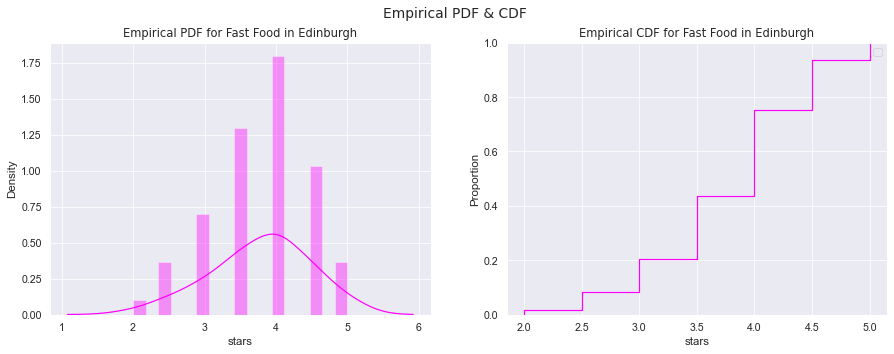

In [129]:
############################################################################################################
##########RQ.2_Edinburgh_fast food / Plotting the empirical PDF in linear log for the business reviews##################
###########################################################################################################
sns.set(context='paper', style='darkgrid', rc={'figure.facecolor':'white'}, font_scale=1.2)
#fig, axes = plt.subplots(1, 2, figsize=(18, 10))
fig, axes = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Empirical PDF & CDF', **hfont)
#Plotting the empirical PDF in log log for the business reviews

sns.distplot(lv2new['stars'], ax=axes[0], color='fuchsia', label='Edinburgh', kde_kws={'bw':.45})  
#plt.xlabel('Number of stars', fontsize = 15, color= "black", **hfont)
#plt.ylabel('Frequency', fontsize = 15, color= "black", **hfont)
#plt.title('Empirical PDF for Fast Food', fontsize =20, color ="black", **hfont)
plt.legend()

sns.ecdfplot(lv2new['stars'], ax=axes[1], label='Edinburgh', color='fuchsia')
axes[0].set_title('Empirical PDF for Fast Food in Edinburgh', **hfont)
axes[1].set_title('Empirical CDF for Fast Food in Edinburgh', **hfont)
#plt.title('Empirical CDF for Fast Food', fontsize =20, color ="black")
#plt.xlabel('Number of stars', fontsize = 15, color= "black")
#plt.show()
#plt.show()
print ('Edinburgh mean', lv2new['stars'].mean())
print('Edinburgh standard deviation', lv2new['stars'].std())
print('Edinburgh excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(lv2new['stars']) ))
print('Edinburgh skewness of normal distribution (should be 0): {}'.format( skew(lv2new['stars']) ))

In [145]:
#fitting the best continuous distribution using Kolmogorov test for evaluation
#Distribution fit for business reviews in Edinburgh for Fast food 
#https://medium.com/@amirarsalan.rajabi/distribution-fitting-with-python-scipy-bb70a42c0aed
results = []
for i in list_of_dists:
    dist = getattr (scipy.stats, i)
    param = dist.fit(lv2new['stars'])
    a = scipy.stats.kstest(lv2new['stars'], i, args=param)
    results.append((i,a[0],a[1]))
    print('for',i,'parameters=', param)
    


results.sort(key=lambda x:float(x[2]), reverse=True)
for j in results:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))
#The solution turns out to be the non central t distribution of NCF
#pearson3: statistic=0.15887764293904527, pvalue=0.00032448266761031535
#for pearson3 parameters= (-0.5049276181806464, 3.7852945966174527, 0.6828851234666395)
#https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python

for alpha parameters= (23.446859815254996, -12.624251036056414, 383.67391894203774)
for anglit parameters= (3.637779142691138, 2.1764175339306036)
for arcsine parameters= (1.9061869538856078, 3.0938130461143927)
for beta parameters= (4.139516304957041, 2.4576604764917, 1.3302302797392618, 3.913860067983544)
for betaprime parameters= (600.2588276910294, 9069.465758766884, -12.61537155154302, 247.79159887920594)
for bradford parameters= (1.0706394374543016, 1.9999993928508442, 3.0000010267869666)
for burr parameters= (13.313694371699228, 0.19346556406273985, 1.6428189829770057, 2.888205562722436)
for burr12 parameters= (6.117072514726416, 98.23383492570133, 0.26485092152658263, 8.028975850436531)
for cauchy parameters= (3.898535561241589, 0.3957131234774012)
for chi parameters= (193.65789247888733, -9.617354899837963, 0.9641138292804143)
for chi2 parameters= (345.2807566510428, -5.396124865076008, 0.026578849629583637)
for cosine parameters= (3.718494686329809, 0.6179819008265072)
for dg

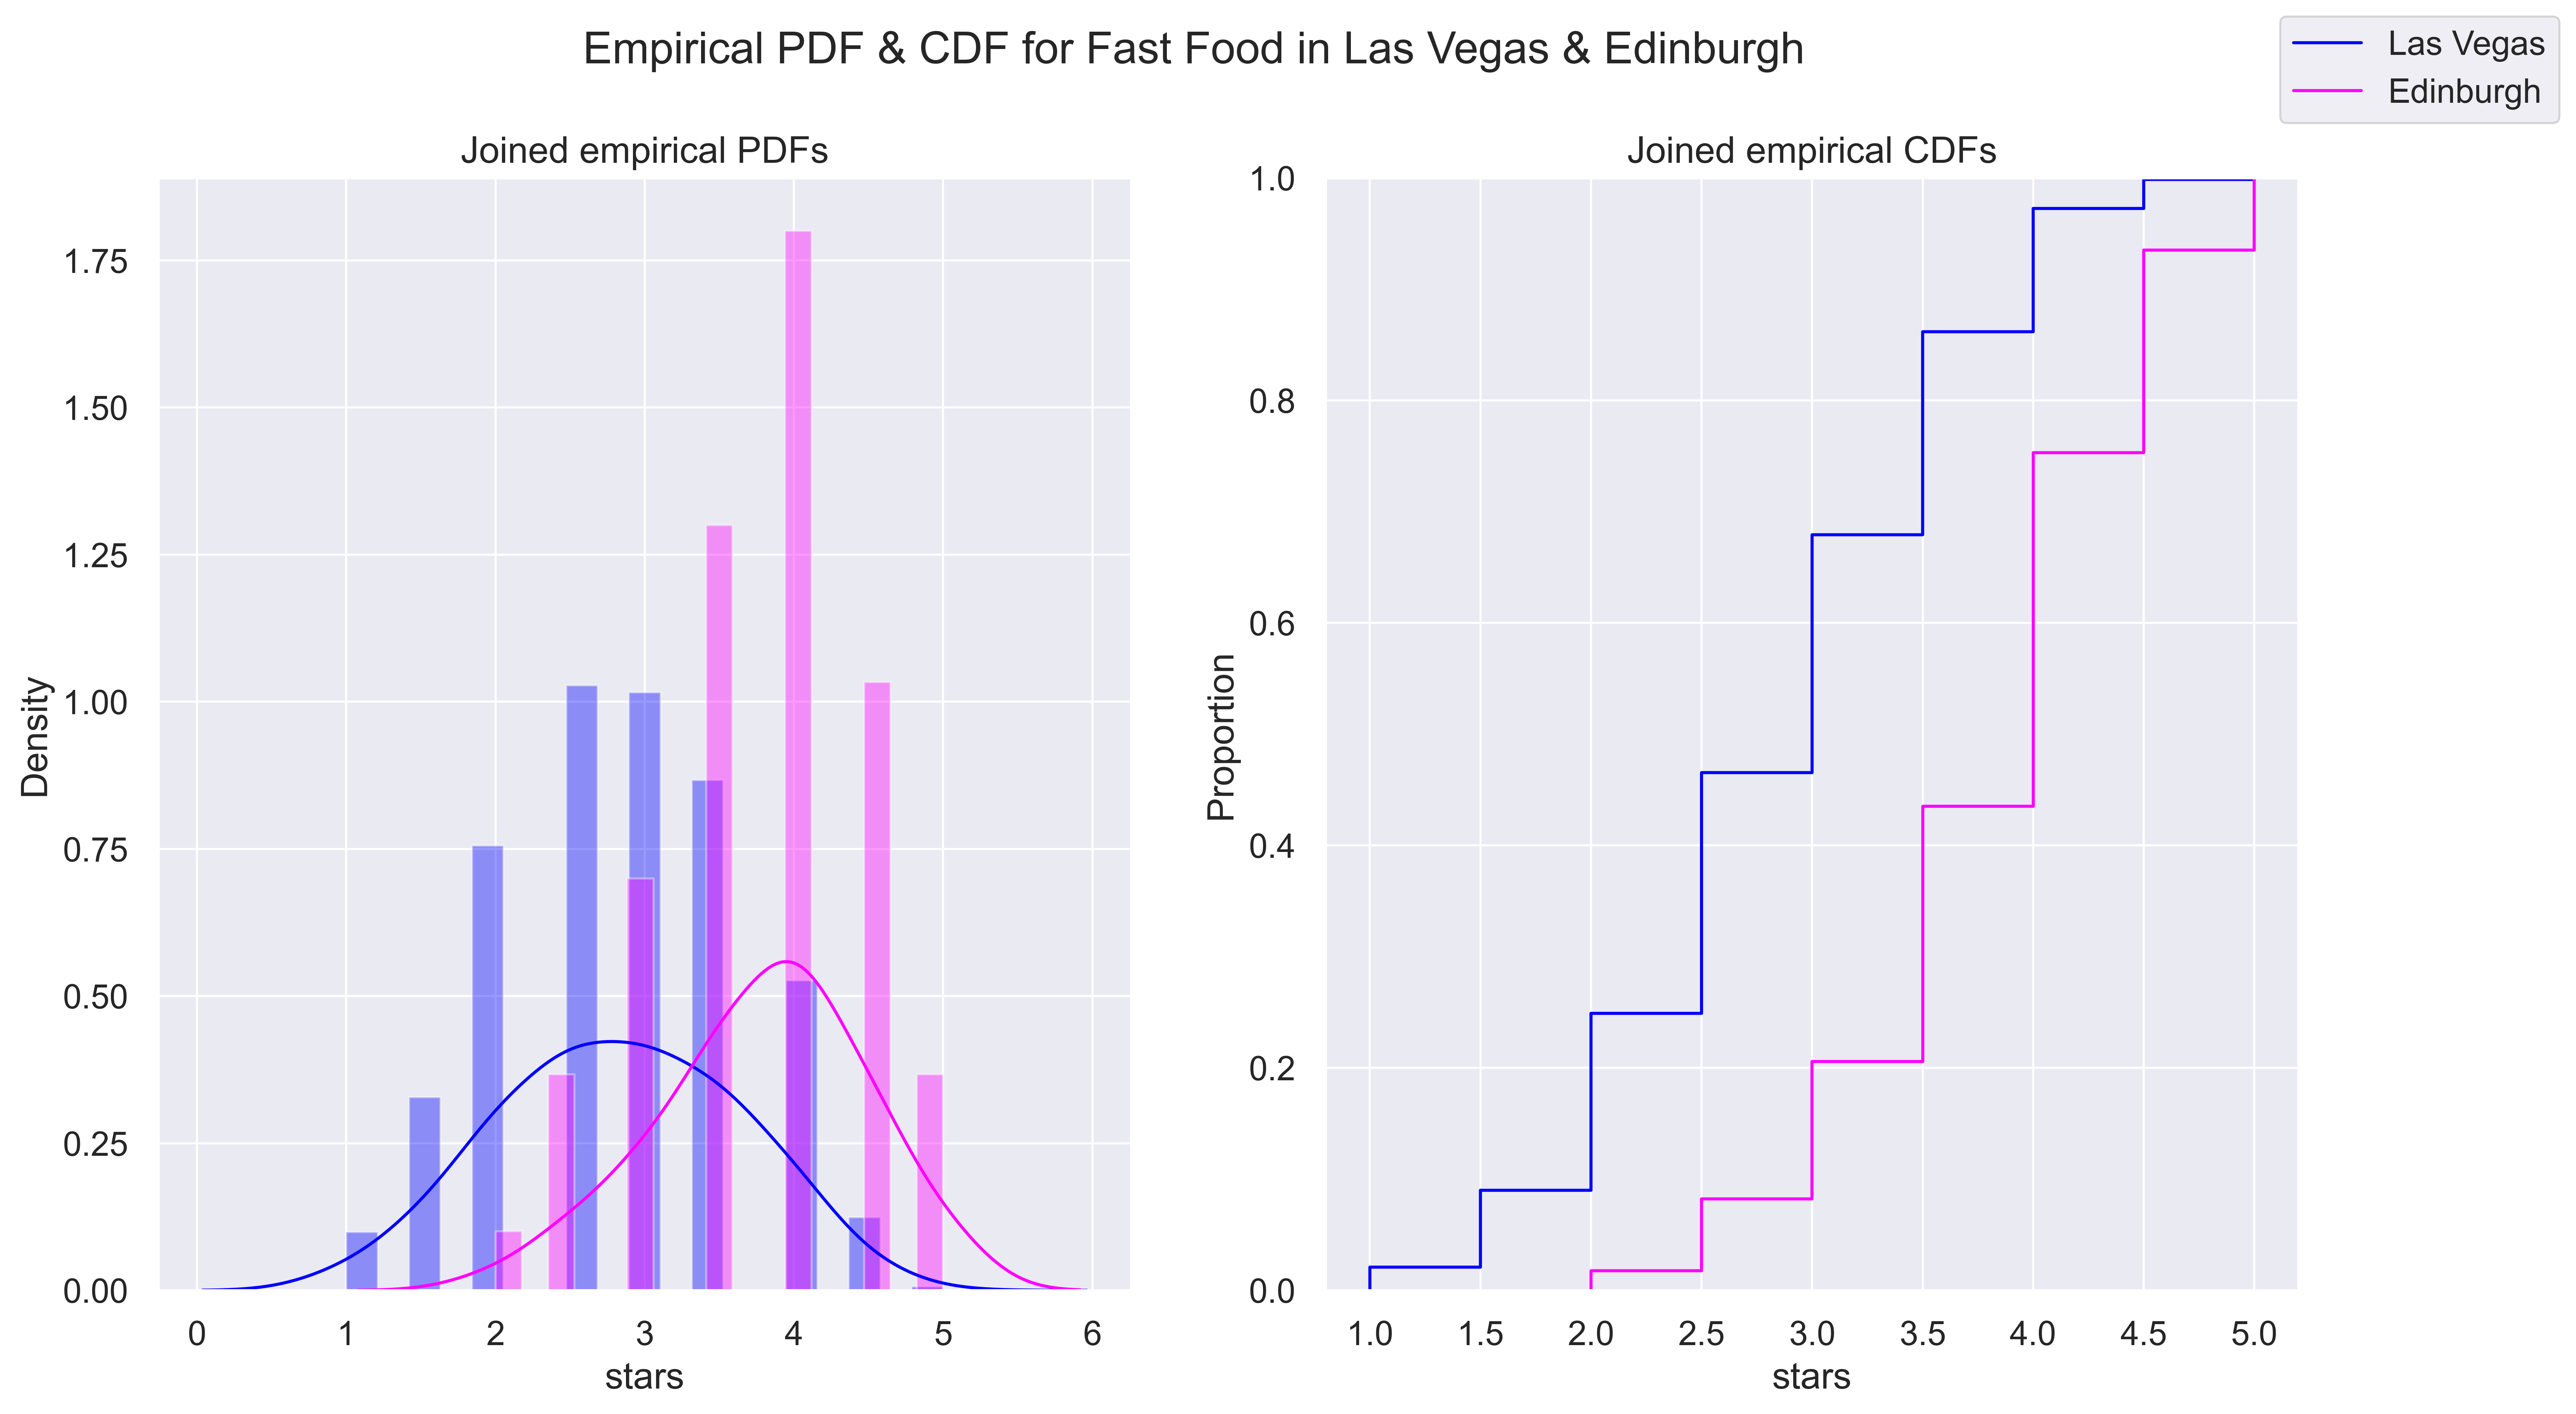

Las Vegas mean 2.83116036505867
Las Vegas standard deviation 0.802968763130169
Las Vegas excess kurtosis of normal distribution (should be 0): -0.5769336681785537
Las Vegas skewness of normal distribution (should be 0): -0.04484085736856959
Edinburgh mean 3.7852941176470587
Edinburgh standard deviation 0.6811634464602424
Edinburgh excess kurtosis of normal distribution (should be 0): -0.2104939091296072
Edinburgh skewness of normal distribution (should be 0): -0.3743327044281754


In [140]:

#import matplotlib as mpl
#mpl.rcParams['figure.dpi']= 500
#from jupyterthemes import jtplot
#jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

sns.set(context='paper', style='darkgrid', rc={'figure.facecolor':'white'}, font_scale=1.5)
fig, axes = plt.subplots(1, 2, figsize=(15,8))
fig.suptitle('Empirical PDF & CDF for Fast Food in Las Vegas & Edinburgh')


#Joint Distributions
axes[0].set_title('Joined empirical PDFs')
axes[1].set_title('Joined empirical CDFs')
sns.distplot(lv1new['stars'],ax=axes[0], color='blue', label='Las Vegas',kde_kws={'bw':.40}) 
sns.distplot(lv2new['stars'],ax=axes[0], color='fuchsia', label='Edinburgh',kde_kws={'bw':.45})  
plt.legend
sns.ecdfplot(lv1new['stars'], ax=axes[1], color='blue')
sns.ecdfplot(lv2new['stars'], ax=axes[1], color='fuchsia')

fig.legend(labels=['Las Vegas','Edinburgh'])
plt.show()
print ('Las Vegas mean', lv1new['stars'].mean())
print('Las Vegas standard deviation',lv1new['stars'].std())
print('Las Vegas excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(lv1new['stars']) ))
print('Las Vegas skewness of normal distribution (should be 0): {}'.format( skew(lv1new['stars']) ))
print('Edinburgh mean', lv2new['stars'].mean())
print('Edinburgh standard deviation',lv2new['stars'].std())
print('Edinburgh excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(lv2new['stars']) ))
print('Edinburgh skewness of normal distribution (should be 0): {}'.format( skew(lv2new['stars']) ))

#plt.savefig('Q2Plot1.png', dpi = 300)

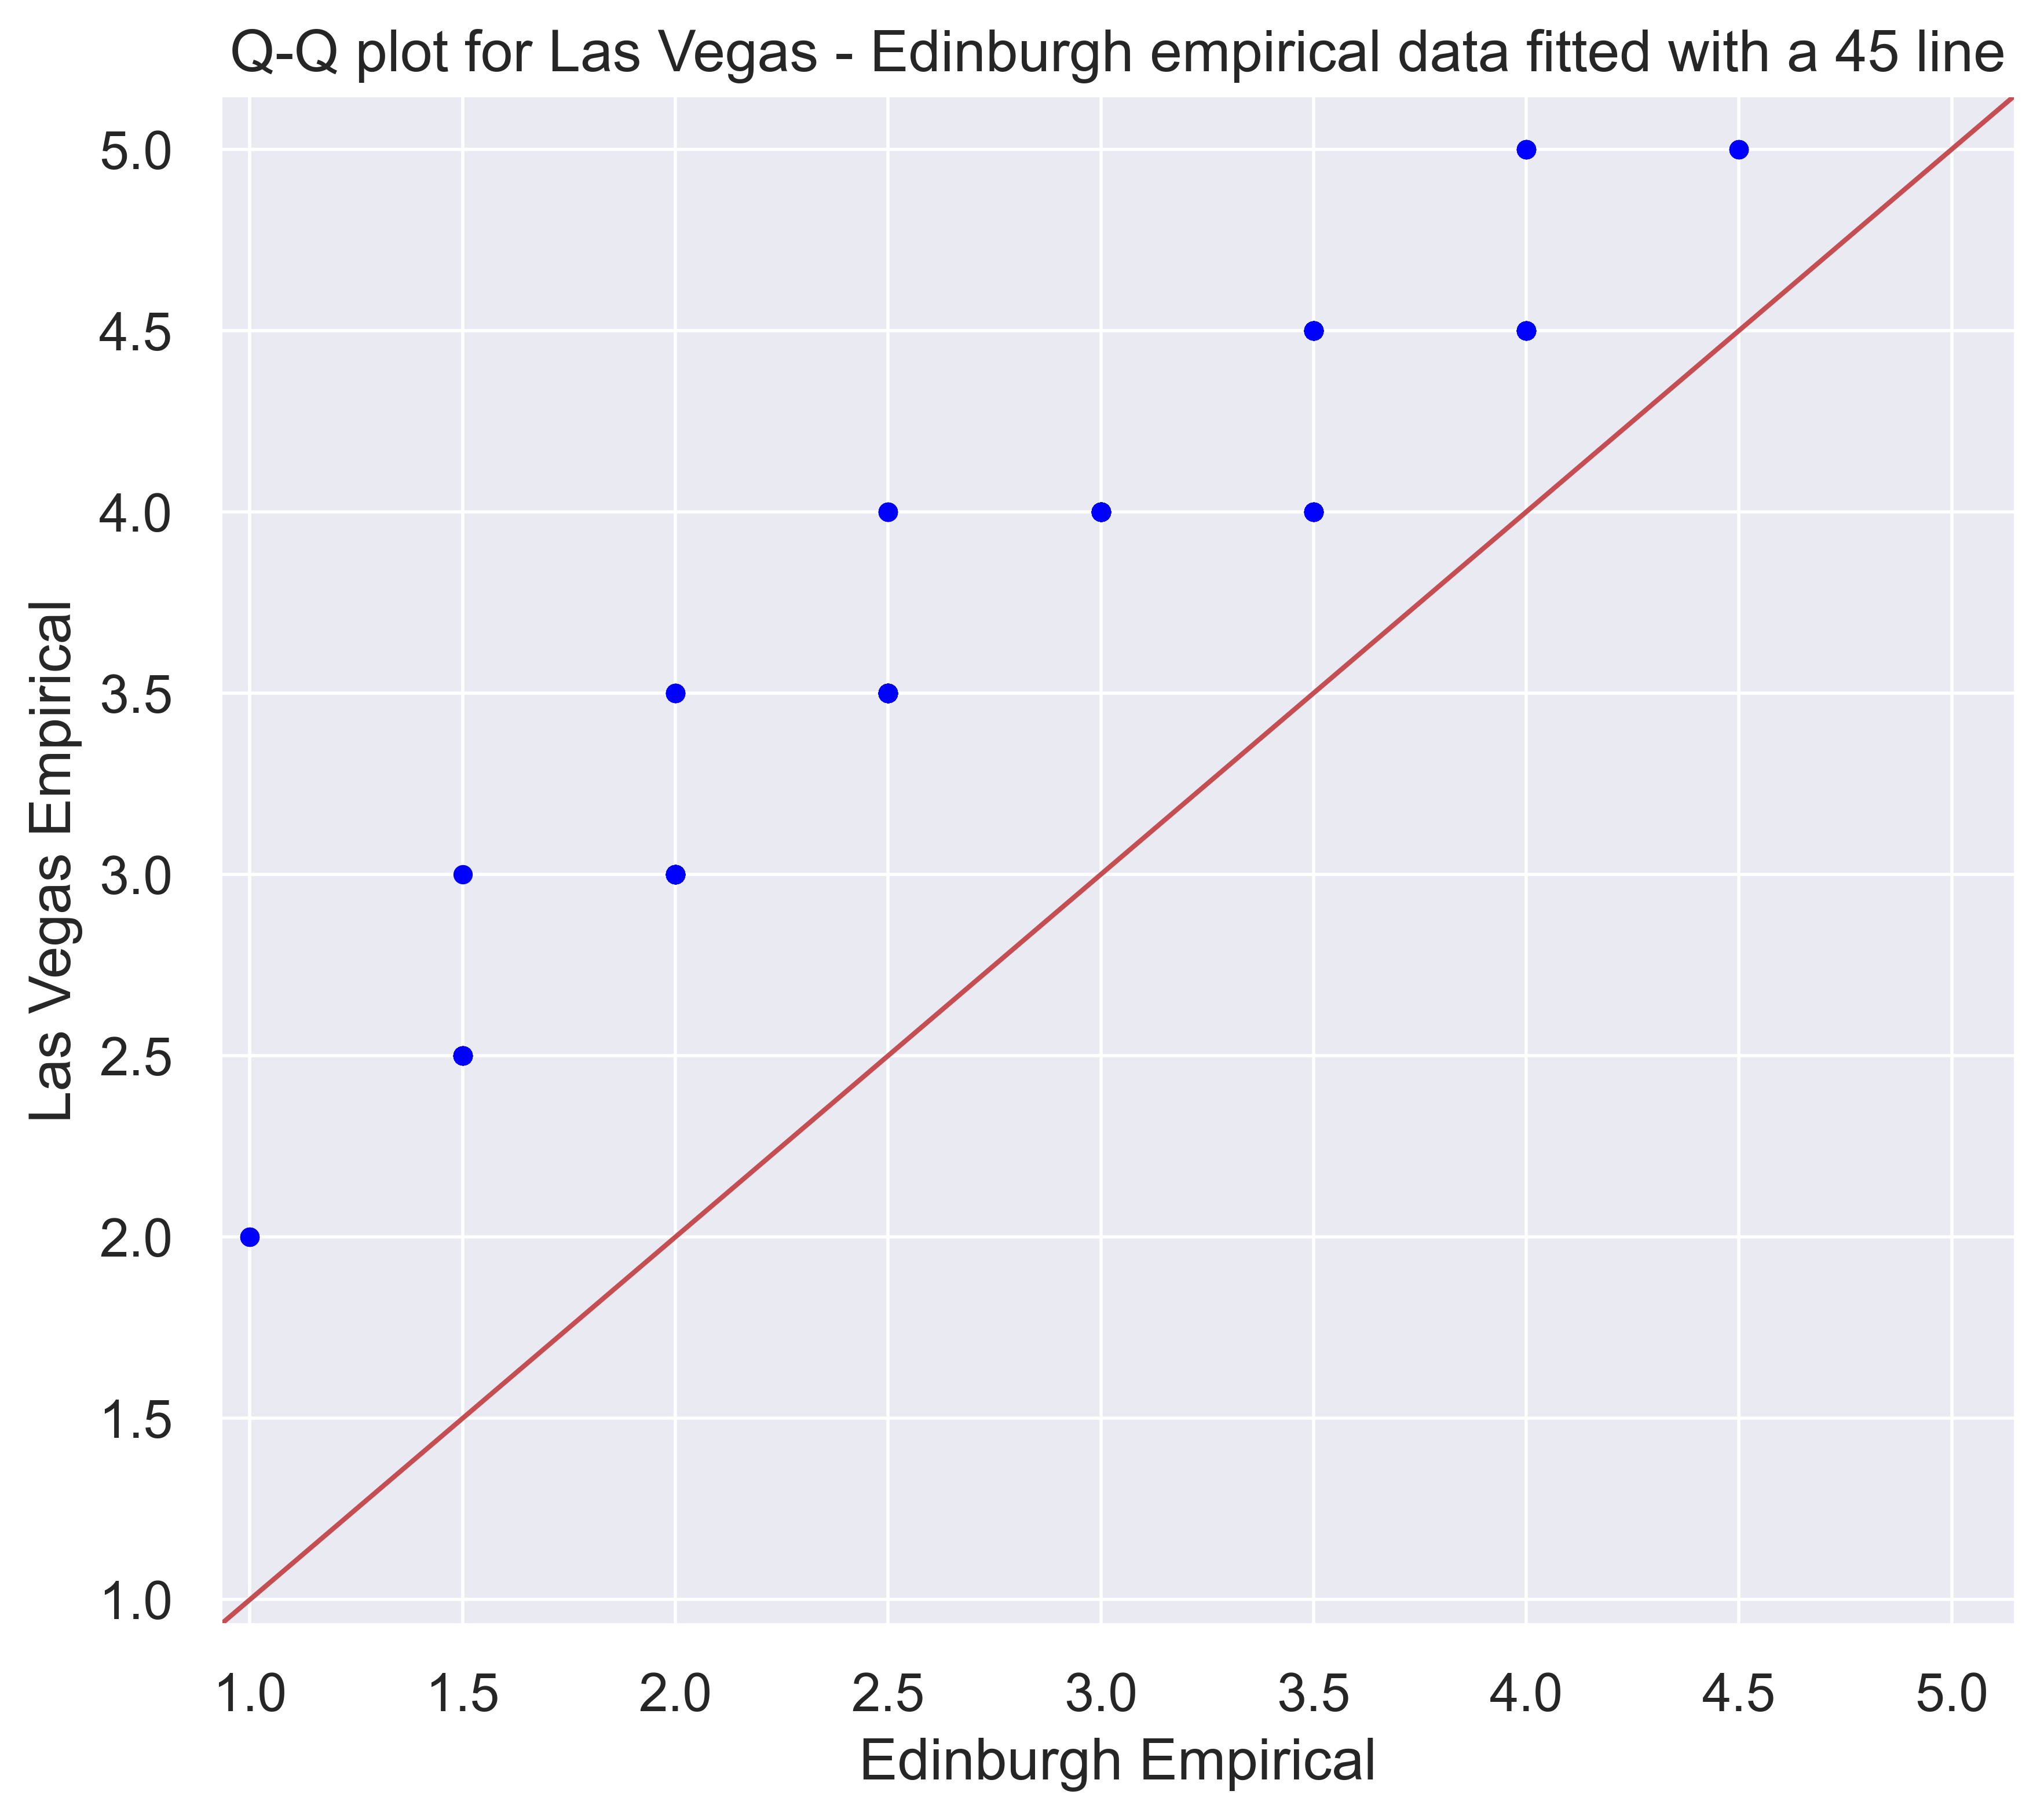

In [142]:
############################################################################################################
##QQ plot to determine the quantiles of the first data set against the quantiles of the second data set. ##################
###########################################################################################################
#https://www.statsmodels.org/devel/generated/statsmodels.graphics.gofplots.qqplot_2samples.html
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples
x = lv1new['stars']
y = lv2new['stars']
pp_x = np.sort(x)
pp_y = np.sort(y)

qqplot_2samples(pp_x, pp_y, xlabel="Las Vegas Empirical", ylabel="Edinburgh Empirical", line="45", ax=None)
plt.title("Q-Q plot for Las Vegas - Edinburgh empirical data fitted with a 45 line")
plt.show()